<a href="https://colab.research.google.com/github/Sejong-Kaggle-Challengers/jeongmin/blob/main/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94(3%EB%93%B1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!unzip data04.zip

Archive:  data04.zip
  inflating: submission.csv          
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [43]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
   creating: __MACOSX/
  inflating: __MACOSX/._train.csv    
Archive:  test.csv.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     


#1. Column 요약
- store_id : 각 파일에서의 상점 고유 번호.
- date : 거래 일자
- time : 거래 시간
- card_id : 카드 번호의 hash 값
- amount : 매출액, 0보다 작은 음수는 거래 취소(환불), 단위 krw 아님, 할부개월수만큼 amount들어옴
- installments : 할부개월수. 일시불은 빈 문자열
- days_of_week : 요일, 월요일이 0, 일요일은 6
- holyday : 1이면 공휴일, 0이면 공휴일 아님

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False #그래프에서 마이너스 기호가 깨지지 않고 표시되도록
from matplotlib import rc
import seaborn as sns
import numpy as np
from collections import Counter

#2. Data Load & Check

In [47]:
train = pd.read_csv("train.csv")
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [48]:
print(train.shape)

(3362796, 8)


In [49]:
train.describe() #데이터 요약 (date/time/card_id는 정수형이 아니라서 제외된 것 같다.)

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


#3. Preprocess
3.1 Remove Outliers
outlier가 있을 수 있다고 판단되는 column을 선택
--> amount --> outlier 제거

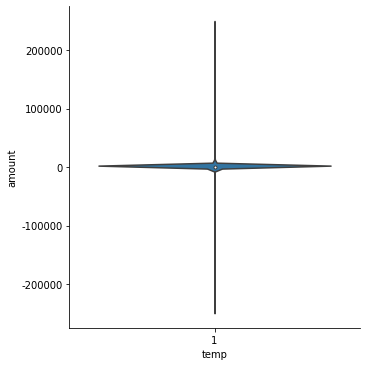

In [50]:
#vilolinplot을 이용해 분포 범위 확인
#: amount의 분포 범위는 넓은데 분포는 한쪽으로 편중되어 확인이 어려움
train["temp"] = 1
sns.catplot(data=train, x = "temp", y = 'amount', kind = 'violin')

In [52]:
#따라서 numpy의 percentile을 이용해 데이터가 차지하는 비율을 확인
#percentile -> 백분위수
percentage_99 = np.percentile(train["amount"], 99)
print(percentage_99)
percentage_98 = np.percentile(train["amount"], 98)
print(percentage_98)

1335.0
800.0


amount의 최대값은 250000, 최소값은 -250000<br>
데이터의 약 99%가 차지하는 위치의 amount값 1335<br>데이터의 약 98%가 차지하는 위치의 amount값 800<br>대부분의 데이터가 1000 이하에 위치하고 있음을 의미한다. <br>따라서 1000이상, -1000이하의 값을 outlier로 간주한다.

In [54]:
#train = train.loc[(train["amount"]&gt;= -1000)&(train["amount"]&lt;= 1000)] 오류뜸
#a gt b --> a > b
#a lt b --> a < b

#outlier 제거
train = train.loc[(train["amount"] > -1000)&(train["amount"]< 1000)]

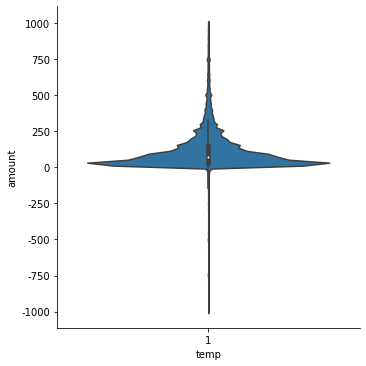

In [56]:
sns.catplot(data=train, x="temp", y="amount", kind="violin")